<a href="https://colab.research.google.com/github/NguyenHien19/Credit-risk-for-bank-user/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

from google.colab import files


In [8]:
sns.set_theme()

Dữ liệu ở đây đã được loại bỏ outlier cơ bản sử dụng IQR

In [9]:

dataset = pd.read_csv("cleaned_data.csv")


In [10]:

dataset.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:

dataset.shape


(146473, 11)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146473 entries, 0 to 146472
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      146473 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  146473 non-null  float64
 2   age                                   146473 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  146473 non-null  int64  
 4   DebtRatio                             146473 non-null  float64
 5   MonthlyIncome                         118224 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       146473 non-null  int64  
 7   NumberOfTimes90DaysLate               146473 non-null  int64  
 8   NumberRealEstateLoansOrLines          146473 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  146473 non-null  int64  
 10  NumberOfDependents                    142707 non-null  float64
dtype

In [13]:

dataset.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146473.000000,146473.000000,146473.000000,146473.000000,146473.000000,1.182240e+05,146473.000000,146473.000000,146473.000000,146473.000000,142707.000000
mean,0.056645,5.933029,52.411735,0.209547,339.363919,6.688368e+03,8.460290,0.060018,1.014139,0.040397,0.756375
std,0.231164,249.407744,14.784272,0.623402,2026.556532,1.446389e+04,5.086106,0.378964,1.080874,0.243490,1.113671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028876,41.000000,0.000000,0.173638,3.406000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.146277,52.000000,0.000000,0.362659,5.416000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.530833,63.000000,0.000000,0.825963,8.284000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,57.000000,17.000000,32.000000,11.000000,20.000000


In [14]:

dataset.isnull().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           28249
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3766
dtype: int64

Nhận xét:<br>
- Data gồm 146473 bản ghi với 11 thuộc tính, tất cả các thuộc tính đều có dạng number
- Có 2 thuộc tính chứa giá trị null (Monthlyincome và NumberOfDependents). Ta sẽ xử lý chúng bằng cách sử dụng forward fill trong thư viện pandas (điền vào giá trị null giá trị đứng trước nó)
- SeriousDlqin2yrs về bản chất là biến phân loại (nominal category)
- RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome có giá trị thực, liên tục
- Các thuộc tính còn lại có giá trị nguyên, rời rạc

In [15]:

dataset['MonthlyIncome'].fillna(method='ffill', inplace=True)
dataset['MonthlyIncome'].describe()


count    1.464730e+05
mean     6.680620e+03
std      1.382540e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.401000e+03
75%      8.282000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [16]:

dataset['NumberOfDependents'].fillna(method='ffill', inplace=True)
dataset['NumberOfDependents'].describe()


count    146473.000000
mean          0.756262
std           1.113847
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

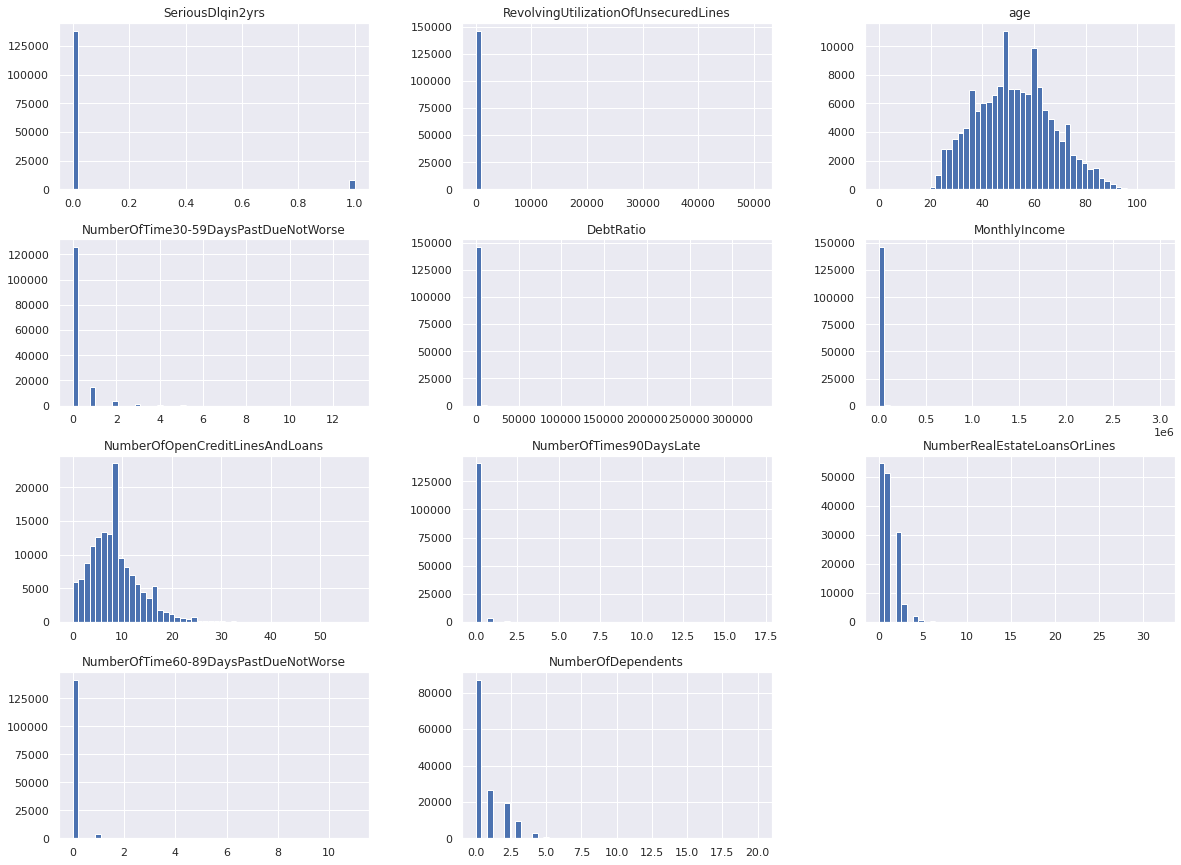

In [18]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

##Xử lý từng thuộc tính

###1. DebtRatio : Tỉ lệ nợ = (Tổng nợ tín dụng + khoản chi định kì trong tháng) / tổng thu nhập định kì hàng tháng

In [19]:

dataset['DebtRatio'].describe()


count    146473.000000
mean        339.363919
std        2026.556532
min           0.000000
25%           0.173638
50%           0.362659
75%           0.825963
max      329664.000000
Name: DebtRatio, dtype: float64

- Gần 75% giá trị tỉ lệ nợ là ít hơn 0.8, trong khi giá trị lớn nhất là 329664 -> đây là giá trị outlier
- Typical value của DebtRatio là 0.4, với trường hợp tỷ lệ nợ > 1 thì khả năng chi trả nợ là không thể, do đó cần xử lý những bản ghi có DebtRatio > 1

In [25]:

dataset[dataset['DebtRatio']>1]['DebtRatio'].count()


33416

- Có 33416 bản ghi ko thỏa mãn, ta sẽ xem các giá trị DebtRatio > 1 như NaN và điền lại giá trị sử dụng hàm fillna() trong thư viện Pandas với giá trị cụ thể dựa trên forward fill

In [27]:

dataset.loc[dataset['DebtRatio']>1, 'DebtRatio']=np.NaN
dataset['DebtRatio'].fillna(method='ffill', inplace=True)
dataset['DebtRatio'].describe()


count    146473.000000
mean          0.302774
std           0.225748
min           0.000000
25%           0.126620
50%           0.274115
75%           0.437443
max           1.000000
Name: DebtRatio, dtype: float64

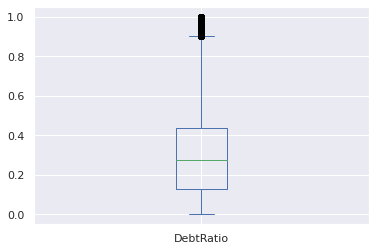

In [30]:
dataset['DebtRatio'].plot(kind="box")

###2. MonthlyIncome : Tổng thu nhập định kỳ hàng tháng

In [31]:

dataset['MonthlyIncome'].describe()


count    1.464730e+05
mean     6.680620e+03
std      1.382540e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.401000e+03
75%      8.282000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

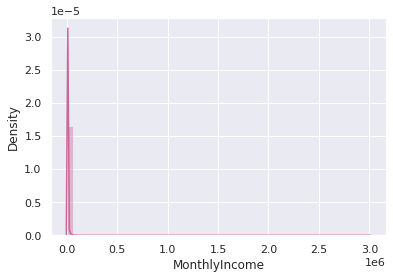

In [37]:

sns.distplot(dataset['MonthlyIncome'], color='#cc6699')


- MonthlyIncome tập trung khá nhiều gần giá trị 0 nên cần xử lý chúng. Để mở thẻ tín dụng thì yêu cầu người vay tín dụng phải đảm bảo về thu nhập hàng tháng cụ thể ở 1 mức nào đó tuỳ bên cho vay đặt ra, cụ thể ở Mỹ là 1000$/tháng

In [38]:

len(dataset[dataset['MonthlyIncome']<1000])


5329

Ở đây có 5329 bản ghi không thoả mãn, ta sẽ sử dụng phương thức tương tự với xử lý DebtRatio

In [39]:

dataset.loc[dataset['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
dataset['MonthlyIncome'].fillna(method='ffill', inplace=True)
dataset['MonthlyIncome'].describe()


count    1.464730e+05
mean     6.922856e+03
std      1.390805e+04
min      1.000000e+03
25%      3.600000e+03
50%      5.541000e+03
75%      8.358000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

- Có thể nhận thấy giá trị lớn nhất của MonthlyIncome quá lớn so với phần lớn dữ liệu -> có thể chứa các giá trị ngoại lai trong khoảng này

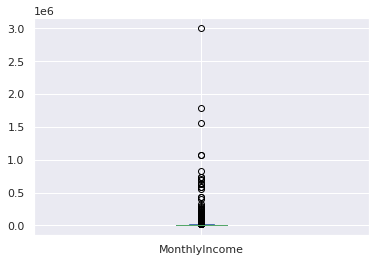

In [41]:

dataset['MonthlyIncome'].plot(kind="box")


In [42]:

len(dataset[dataset['MonthlyIncome']>20000])


2670

- Nhận thấy các giá trị > 20000 là ko đáng kể nên có thể xem chúng như 20000

In [43]:

dataset.loc[dataset['MonthlyIncome']>20000, 'MonthlyIncome']=20000
dataset['MonthlyIncome'].describe()


count    146473.000000
mean       6521.928198
std        4016.848229
min        1000.000000
25%        3600.000000
50%        5541.000000
75%        8358.000000
max       20000.000000
Name: MonthlyIncome, dtype: float64

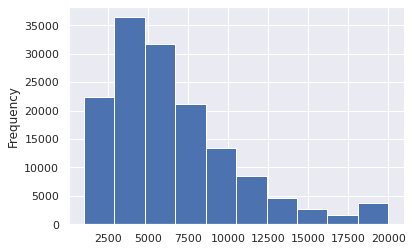

In [45]:

dataset['MonthlyIncome'].plot(kind="hist")


###3. NumberOfOpenCreditLinesAndLoans : Số tài khoản tín dụng (bao gồm mọi hình thức từ chi tiêu tới thế chấp nhà, xe,...)



In [46]:

dataset['NumberOfOpenCreditLinesAndLoans'].describe()


count    146473.000000
mean          8.460290
std           5.086106
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

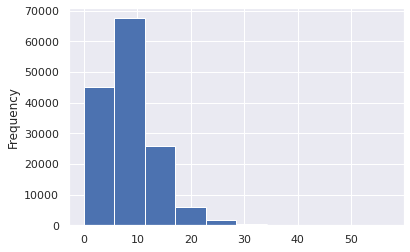

In [49]:
dataset['NumberOfOpenCreditLinesAndLoans'].plot(kind="hist")


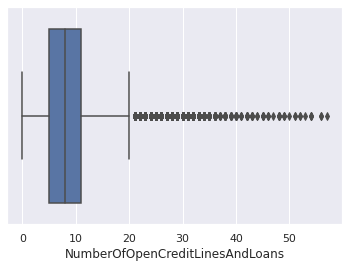

In [ ]:

sns.boxplot(dataset['NumberOfOpenCreditLinesAndLoans'])


- Các giá trị >= 30 là các giá trị outliers nên ta cần xử lý chúng

In [50]:

len(dataset[dataset['NumberOfOpenCreditLinesAndLoans']>20])


3620

In [51]:

len(dataset[dataset['NumberOfOpenCreditLinesAndLoans']>30])


323

- Vì số lượng bản ghi > 30 ko quá lớn nên ta sẽ gộp chúng lại giá trị max là 30

In [52]:

dataset.loc[dataset['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30
dataset['NumberOfOpenCreditLinesAndLoans'].describe()


count    146473.000000
mean          8.447106
std           5.014445
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

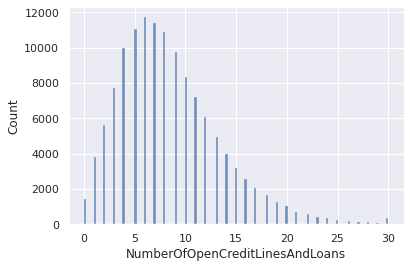

In [ ]:

sns.histplot(dataset['NumberOfOpenCreditLinesAndLoans'])


###4. NumberRealEstateLoansOrLines : Số lượng các khoản vay thế chấp và bất động sản bao gồm hạn mức tín dụng vốn chủ sở hữu nhà


In [53]:

dataset['NumberRealEstateLoansOrLines'].describe()



count    146473.000000
mean          1.014139
std           1.080874
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

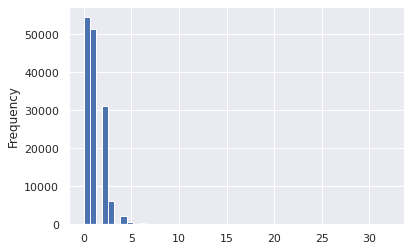

In [56]:

dataset['NumberRealEstateLoansOrLines'].plot(kind="hist", bins=50)


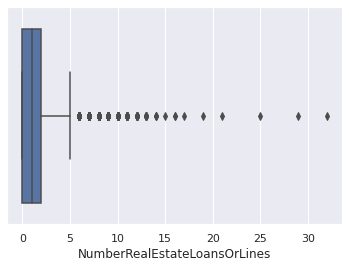

In [ ]:

sns.boxplot(dataset['NumberRealEstateLoansOrLines'])


- Nhận thấy rằng các giá trị >= 6 ko được thể hiện rõ -> giá trị ngoại lai

In [57]:

len(dataset[dataset['NumberRealEstateLoansOrLines']>5])


619

- Ta sẽ gộp các giá trị > 5 lại giá trị max là 5

In [58]:

dataset.loc[dataset['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines']=5
dataset['NumberRealEstateLoansOrLines'].describe()


count    146473.000000
mean          1.003222
std           1.012634
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

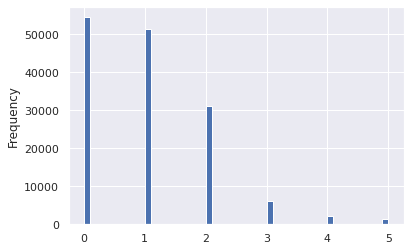

In [60]:

dataset['NumberRealEstateLoansOrLines'].plot(kind="hist", bins=50)


###5. Age

In [61]:

dataset['age'].describe()


count    146473.000000
mean         52.411735
std          14.784272
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

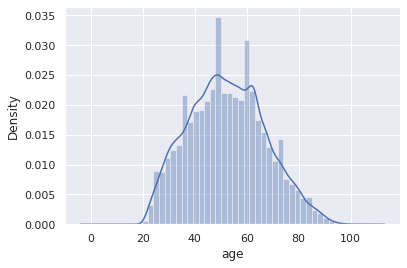

In [62]:

sns.distplot(dataset['age'])


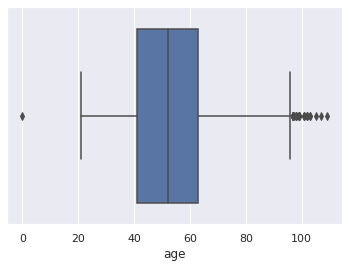

In [ ]:

sns.boxplot(dataset['age'])


- Có thể thấy các giá trị <20 và >80 khá ít nên có thể xem như ngoại lệ, do đó ta sẽ gộp các giá trị này lại 


In [63]:

dataset.loc[dataset['age']>80, 'age']=80
dataset.loc[dataset['age']<20, 'age']=20


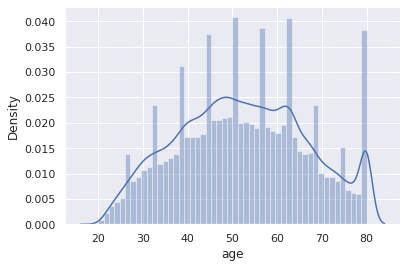

In [64]:

sns.distplot(dataset['age'])


In [65]:

dataset['age'].describe()


count    146473.000000
mean         52.234248
std          14.398377
min          20.000000
25%          41.000000
50%          52.000000
75%          63.000000
max          80.000000
Name: age, dtype: float64

## Phân tích dữ liệu

- Vì tất cả dữ liệu đều là dạng number, ta sẽ xem xét mối quan hệ tuyến tính giữa chúng sử dụng correlation coeficient
- Nếu chỉ số corr càng gần 1, chứng tỏ 2 thuộc tính càng có mối quan hệ tuyến tính positive, nếu càng gần -1 thì liên quan tuyến tính negative, và 0 thì không có mối tương quan nào

In [67]:

dataset.corr()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.002715,-0.108679,0.217615,0.040712,-0.049472,-0.020212,0.248690,-0.010871,0.178526,0.045535
RevolvingUtilizationOfUnsecuredLines,-0.002715,1.000000,-0.006030,-0.003005,0.001920,0.015503,-0.011625,-0.001634,0.006830,-0.002502,0.001600
age,-0.108679,-0.006030,1.000000,-0.070573,-0.055101,0.074769,0.150950,-0.077559,0.037579,-0.062871,-0.206860
NumberOfTime30-59DaysPastDueNotWorse,0.217615,-0.003005,-0.070573,1.000000,0.079829,-0.007822,0.078533,0.101315,0.037161,0.164713,0.065070
DebtRatio,0.040712,0.001920,-0.055101,0.079829,1.000000,-0.083353,0.278172,-0.025268,0.409553,0.021483,0.079018
MonthlyIncome,-0.049472,0.015503,0.074769,-0.007822,-0.083353,1.000000,0.204659,-0.052547,0.292812,-0.031051,0.152892
NumberOfOpenCreditLinesAndLoans,-0.020212,-0.011625,0.150950,0.078533,0.278172,0.204659,1.000000,-0.097358,0.436227,-0.021162,0.067505
NumberOfTimes90DaysLate,0.248690,-0.001634,-0.077559,0.101315,-0.025268,-0.052547,-0.097358,1.000000,-0.073233,0.089295,0.026893
NumberRealEstateLoansOrLines,-0.010871,0.006830,0.037579,0.037161,0.409553,0.292812,0.436227,-0.073233,1.000000,-0.026140,0.136658
NumberOfTime60-89DaysPastDueNotWorse,0.178526,-0.002502,-0.062871,0.164713,0.021483,-0.031051,-0.021162,0.089295,-0.026140,1.000000,0.033813


In [69]:

dataset = dataset.rename(columns={'SeriousDlqin2yrs': 'Serious2yrs',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'age':'Age',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'RealEstate',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Depends'})


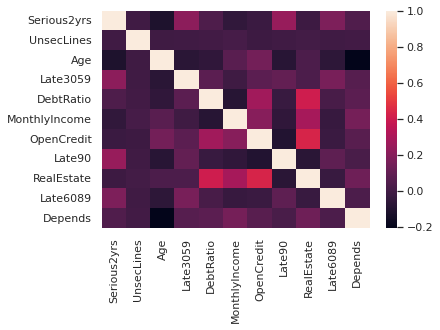

In [70]:

sns.heatmap(dataset.corr())


###DebtRatio + NumberRealEstateLoansOrLines

DebtRatio - tỷ lệ nợ là 1 trường dữ liệu quan trọng trong cho vay tín dụng vì các ngân hàng và người cho vay sẽ dựa vào đó để xem xét 1 người có khả năng chi trả nợ ko trước khi bắt đầu rơi vào tình trạng khó khăn về tài chính, họ sẽ dựa vào đó để đặt ra khoản cho vay. DebtRatio lý tưởng <= 30%, và người dùng sẽ cố gắng giữ cho DebtRatio của mình ở mức thấp nhất có thể để tránh mất kiểm soát nợ nần, đồng thời có thể ước tính để đầu tư cho các khoản vay lớn


Dựa trên cách tính DebtRatio, cách thông thường nhất để giữ DebtRatio ở mức lý tưởng là tăng thu nhập hàng tháng (MonthlyIncome) và giảm số chi tiêu tín dụng + các khoản chi khác trong tháng

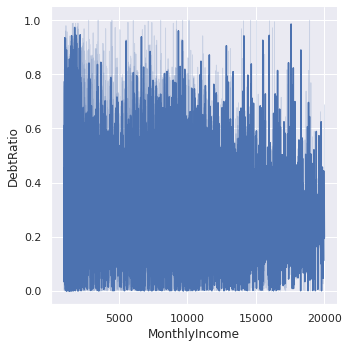

In [ ]:

sns.relplot(data=dataset, x='MonthlyIncome', y="DebtRatio", kind="line")


- Tuy nhiên khi nhìn vào biểu đồ, ta thấy DebtRatio biến động thất thường theo MonthyIncome chứ ko theo quy luật nào, do đó còn có yếu tố khác tác động đến DebtRatio

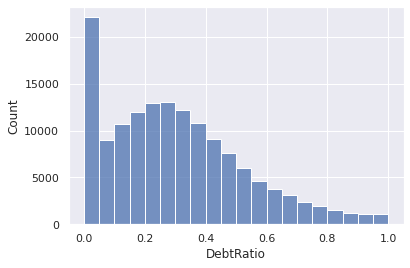

In [ ]:

sns.histplot(dataset['DebtRatio'], bins=20)


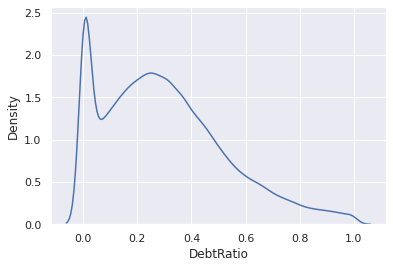

In [ ]:

sns.kdeplot(dataset['DebtRatio'])


- Nhìn vào biểu đồ phân bố tần suất histogram và biểu đồ mật độ kde, ta thấy:
    + Biểu đồ có dạng Double-Peaked, tức là ở đây có sự bất thường về phân phối tần suất DebtRatio. Do đó cần tìm ra nguyên nhân dẫn đến sự ko cân xứng này
    + Thông thường nguyên nhân dẫn đến biểu đồ có dạng Double-Peaks là vì đây là kết quả của 2 quá trình phân tích có phân phối khác nhau được gộp lại 


- Có thể thấy DebtRatio có liên quan đến NumberOfOpenCreditLinesAndLoans và NumberRealEstateLoansOrLines thông qua biểu đồ heatmap

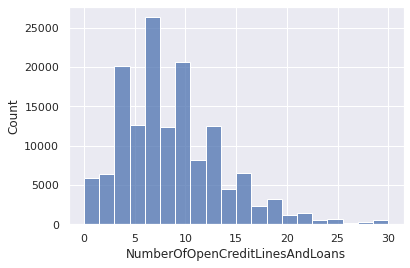

In [ ]:

sns.histplot(dataset['NumberOfOpenCreditLinesAndLoans'], bins=20)


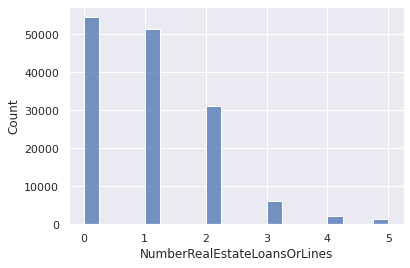

In [ ]:

sns.histplot(dataset['NumberRealEstateLoansOrLines'], bins=20)


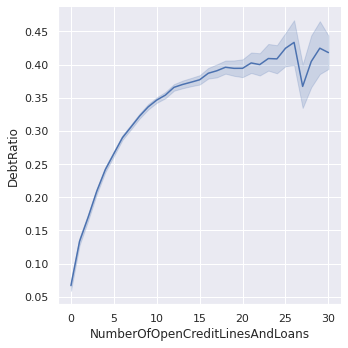

In [ ]:

sns.relplot(data=dataset, x="NumberOfOpenCreditLinesAndLoans", y="DebtRatio", kind="line")


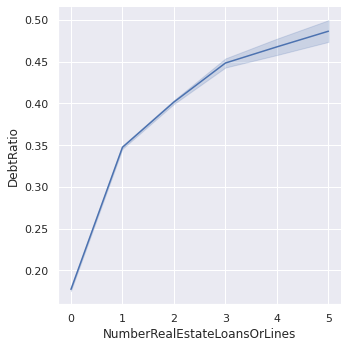

In [ ]:

sns.relplot(data=dataset, x="NumberRealEstateLoansOrLines", y="DebtRatio", kind="line")


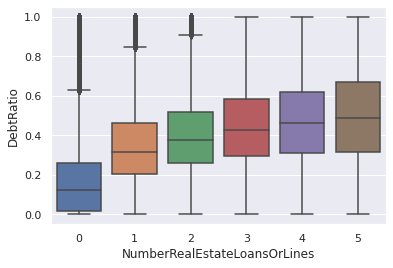

In [ ]:

sns.boxplot(data=dataset, x='NumberRealEstateLoansOrLines', y='DebtRatio')


- Nhận xét : DebtRatio tương quan đồng biến với NumberOfOpenCreditLinesAndLoans và NumberRealEstateLoansOrLines, tức là DebtRatio sẽ tăng nếu 2 đại lượng này tăng, mà chúng còn tăng rất nhanh. Chỉ cần có 1 khoản vay thế chấp nhà đất,... thì DebtRatio đã tăng lên đến 0.3, 0.35 -> đây là 2 đại lượng dẫn đến DebtRatio tăng nhanh chóng. Do đó, để giảm tỷ lệ nợ thì người dùng cần giảm thiểu các khoản vay thế chấp nhà đất,... tương ứng

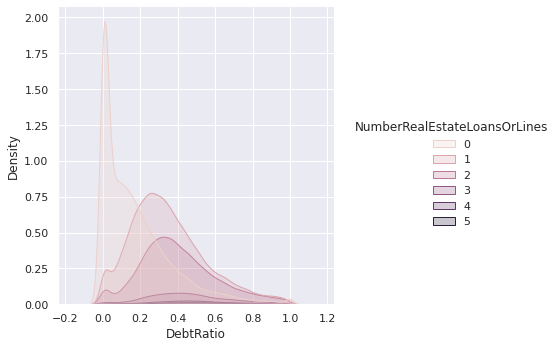

In [ ]:

sns.displot(data=dataset, x="DebtRatio", hue="NumberRealEstateLoansOrLines", kind="kde", fill=True)


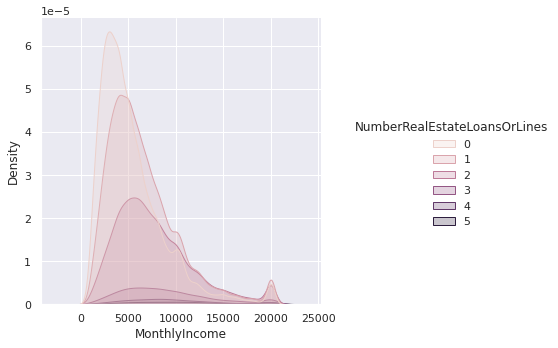

In [ ]:

sns.displot(data=dataset, x="MonthlyIncome", hue="NumberRealEstateLoansOrLines", kind="kde", fill=True)


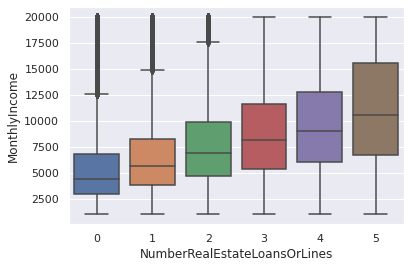

In [ ]:

sns.boxplot(data=dataset, y="MonthlyIncome", x="NumberRealEstateLoansOrLines")


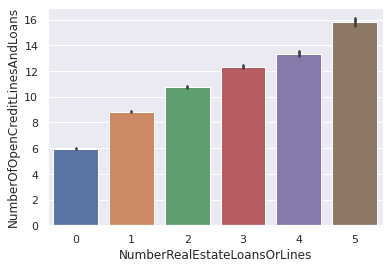

In [ ]:

sns.barplot(data=dataset, y="NumberOfOpenCreditLinesAndLoans", x="NumberRealEstateLoansOrLines")


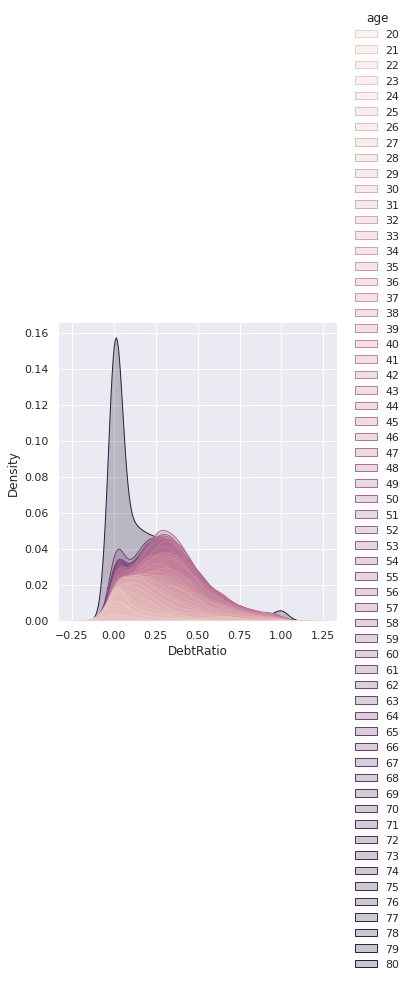

In [ ]:

sns.displot(data=dataset, x="DebtRatio", hue="age", kind="kde", fill=True)
